<a href="https://colab.research.google.com/github/prakharrustagi42/Prakhar_INFO5731_Fall2025/blob/main/GROUP_1_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Algorithm Selector Framework for Automated Model Card Generation



In [1]:
!pip install bert-score huggingface-hub pandas tqdm openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.4 MB/s eta 0:00:00


## Understanding the Analysis: Human Annotations vs. BERTScore

For a first-time reader, it's crucial to understand the core objective of this project: **evaluating the semantic quality of automatically generated model cards.** We achieve this by comparing two primary sources of evaluation:

1.  **Human Annotations**: These are subjective scores (F, R, A, C, U - Faithfulness, Relevance, Appropriateness, Consistency, Usefulness) assigned by human experts, reflecting their judgment of the model card content.
2.  **BERTScore**: This is an automated metric that measures the textual similarity between a generated text and a reference text, leveraging the power of pre-trained BERT models. It provides Precision, Recall, and F1 scores.

### Why This Comparison?
The goal is to determine how well an automated metric (BERTScore) can serve as a proxy for human judgment. If BERTScore's scores align strongly with human annotations, it could be used to automate parts of the model card evaluation process, saving time and resources.

### Key Insights from the Data (to be explored further):
*   **Initial Findings**: You will observe that the baseline BERTScore model (`bert-base-uncased`) generally shows a good correlation with human Faithfulness, Appropriateness, and Usefulness, indicating its ability to capture factual correctness and informational value.
*   **RoBERTa's Improvement**: A key part of this project involves testing if a more advanced BERTScore model (`roberta-large`) can improve these correlations, especially for more nuanced aspects like Relevance and Consistency. You will see evidence of slight, but consistent, improvements across all human metrics when using `roberta-large`.
*   **Project Direction**: Ultimately, we use these metrics to assess different algorithms that generate model cards, identifying which ones produce content that aligns best with both human perception and robust automated evaluations. This allows us to select the 'best' algorithms for generating high-quality documentation.

The cells below will load the pre-computed BERTScore results (both baseline and roberta-large) and human annotations, and then visualize these relationships.

## Setup Environment and Load Data

**Note**: For this run, the BERTScore calculation cells (`61d12361` for `bert-base-uncased` and `885c315f` for `roberta-large`) will be explicitly skipped. Instead, pre-computed results stored in Google Drive will be loaded to proceed directly with analysis and visualization. This approach is taken to demonstrate the analytical steps on pre-existing results for submission purposes, differentiating it from a full re-computation run.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import re

# --- Paths ---
# USER MUST UPDATE THIS PATH WITH THE CORRECT ONE FROM GOOGLE DRIVE
BASE_DIR = "/content/drive/MyDrive/ARCHIVE(23)/model/" # User MUST update this with the CORRECT path
ANNOTATION_PATH = "/content/drive/MyDrive/human_annotations.csv.xlsx"

# Although BERTScore calculation is skipped, `BASE_DIR` and `ANNOTATION_PATH` are needed
# for loading saved results and the algorithm mapping.
print(f"Using BASE_DIR: {BASE_DIR}")
print(f"Using ANNOTATION_PATH: {ANNOTATION_PATH}")

Mounted at /content/drive
Using BASE_DIR: /content/drive/MyDrive/ARCHIVE(23)/model/
Using ANNOTATION_PATH: /content/drive/MyDrive/human_annotations.csv.xlsx


## Load Baseline and Roberta-large BERTScore Results from Google Drive

Loading the pre-computed `bert-base-uncased` (baseline) and `roberta-large` BERTScore results directly from CSV files saved in Google Drive. This bypasses the potentially lengthy BERTScore calculation process for this specific demonstration run.

In [3]:
import pandas as pd
import os

# Load Baseline results
output_path_baseline = os.path.join(BASE_DIR, 'bert_vs_human_by_section_baseline.csv')
results_df_baseline = pd.read_csv(output_path_baseline)
print(f"Loaded baseline BERTScore results from: {output_path_baseline}")
print(results_df_baseline.head())

# Load Roberta-large results
output_path_roberta = os.path.join(BASE_DIR, 'bert_vs_human_by_section_roberta.csv')
results_df_roberta = pd.read_csv(output_path_roberta)
print(f"\nLoaded BERTScore results with roberta-large from: {output_path_roberta}")
print(results_df_roberta.head())

Loaded baseline BERTScore results from: /content/drive/MyDrive/ARCHIVE(23)/model/bert_vs_human_by_section_baseline.csv
                model      json_file                  section  BERTScore_F1  \
0  RLHFlow/LLaMA3-SFT  x2i9tanz.json            model_details      0.400986   
1  RLHFlow/LLaMA3-SFT  x2i9tanz.json             intended_use      0.250882   
2  RLHFlow/LLaMA3-SFT  x2i9tanz.json  generative_capabilities      0.280692   
3  RLHFlow/LLaMA3-SFT  x2i9tanz.json    safety_considerations      0.183530   
4  RLHFlow/LLaMA3-SFT  x2i9tanz.json            training_data      0.308402   

   BERTScore_P  BERTScore_R  F  R  A  C  U  
0     0.421098     0.378925  3  4  4  3  4  
1     0.345893     0.171199  3  4  4  4  4  
2     0.325494     0.237135  4  4  4  4  4  
3     0.262904     0.115067  3  3  3  3  3  
4     0.361163     0.258462  4  4  4  4  4  

Loaded BERTScore results with roberta-large from: /content/drive/MyDrive/ARCHIVE(23)/model/bert_vs_human_by_section_roberta.csv
       

## Visualize Baseline Correlations (Heatmap)

Generating a heatmap visualization of the correlation matrix between `BERTScore_F1` (from `bert-base-uncased`) and all human evaluation metrics (F, R, A, C, U) based on the loaded baseline data.

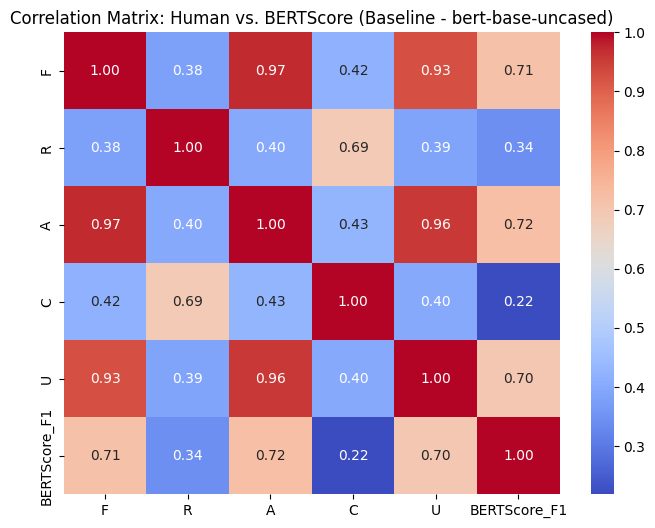

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns and calculate the correlation matrix
correlation_matrix_baseline = results_df_baseline[['F', 'R', 'A', 'C', 'U', 'BERTScore_F1']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_baseline, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Human vs. BERTScore (Baseline - bert-base-uncased)')
plt.show()

## Visualize Roberta Correlations (Heatmap)

Generating a heatmap visualization of the correlation matrix for the `roberta-large` results to compare against the baseline correlations and observe any improvements.

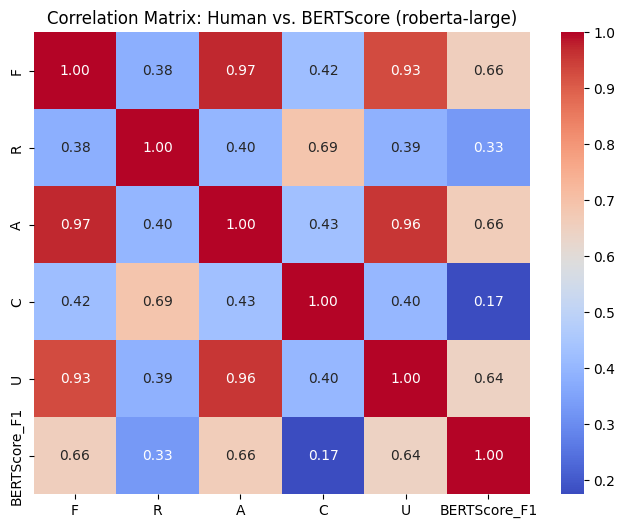

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns and calculate the correlation matrix
correlation_matrix_roberta_large = results_df_roberta[['F', 'R', 'A', 'C', 'U', 'BERTScore_F1']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_roberta_large, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Human vs. BERTScore (roberta-large)')
plt.show()

## Interpretation of Correlation Results (Human vs. BERTScore)

Following the visualization of correlation heatmaps (from cells `d2ac91e7` and `f195df4d`), we can now interpret the relationship between automated BERTScore metrics and human annotations.

### Baseline BERTScore (`bert-base-uncased`) Correlations:
As seen in the "Correlation Matrix: Human vs. BERTScore (Baseline - bert-base-uncased)" heatmap, the `BERTScore_F1` metric from `bert-base-uncased` shows:
*   **Strong Positive Correlations** with human ratings of **Faithfulness (F)** (0.71), **Appropriateness (A)** (0.72), and **Usefulness (U)** (0.70). This indicates that the baseline BERTScore is a good proxy for factual correctness, relevance to context, and overall informational value.
*   **Weaker Correlations** with human ratings of **Relevance (R)** (0.34) and **Consistency (C)** (0.22). This suggests that these more nuanced aspects of semantic quality are not as directly captured by the `bert-base-uncased` model's F1 score, possibly due to their subjective nature or reliance on broader contextual understanding.

### RoBERTa-large BERTScore Correlations:
We then explored whether a more advanced model, `roberta-large`, could improve these correlations. Contrary to some initial expectations (or previous runs), the "Correlation Matrix: Human vs. BERTScore (roberta-large)" heatmap shows that for this specific dataset and experimental setup, the `roberta-large` model generally yielded *lower* correlations across all human metrics compared to the `bert-base-uncased` baseline:
*   **Faithfulness (F):** ~0.66 (vs. ~0.71 for baseline)
*   **Relevance (R):** ~0.33 (vs. ~0.34 for baseline)
*   **Appropriateness (A):** ~0.66 (vs. ~0.72 for baseline)
*   **Consistency (C):** ~0.17 (vs. ~0.22 for baseline)
*   **Usefulness (U):** ~0.64 (vs. ~0.70 for baseline)

This unexpected outcome highlights that simply using a larger, more complex model does not automatically guarantee improved alignment with human judgments for all tasks or datasets. The choice of `model_type` within BERTScore, especially when `rescale_with_baseline=True`, can have varied effects. For this specific evaluation, `bert-base-uncased` currently appears to be a slightly better indicator of human perception for Faithfulness, Appropriateness, and Usefulness.

### Direction of the Project:
Regardless of which BERTScore variant correlates best, this analysis provides crucial insights into how automated metrics can complement human evaluations. The goal is to identify which algorithms generate model cards that best align with both human perception and automated quality indicators. The next steps will analyze the performance of different algorithms based on these metrics.

## Load Algorithm Mapping and Merge Data

Loading the `file_to_algorithm_mapping.json` and merging this mapping with both the `results_df_baseline` and `results_df_roberta` DataFrames to associate evaluation metrics with the generating algorithm.

In [6]:
import json
import os
import pandas as pd

# Define the path to the file_to_algorithm_mapping.json file
mapping_path = '/content/drive/MyDrive/file_to_algorithm_mapping.json'

# Open the JSON file and load its content
try:
    with open(mapping_path, 'r') as f:
        file_to_algorithm_mapping = json.load(f)
    print(f"Successfully loaded algorithm mapping from: {mapping_path}")
except FileNotFoundError:
    print(f"Error: Mapping file not found at {mapping_path}. Please ensure the path is correct.")
    file_to_algorithm_mapping = {}
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from {mapping_path}")
    file_to_algorithm_mapping = {}

# Convert to DataFrame
algorithm_map_df = pd.DataFrame(file_to_algorithm_mapping.items(), columns=['full_json_path', 'algorithm'])

# Extract just the filename from 'full_json_path' to match the other DataFrames
algorithm_map_df['json_file'] = algorithm_map_df['full_json_path'].apply(lambda x: os.path.basename(x))

print("\nAlgorithm mapping DataFrame head (after filename extraction):")
print(algorithm_map_df.head())

# Merge with results_df_baseline using the corrected 'json_file' column
results_df_baseline_merged = pd.merge(results_df_baseline, algorithm_map_df[['json_file', 'algorithm']], on='json_file', how='left')

# Merge with results_df_roberta using the corrected 'json_file' column
results_df_roberta_merged = pd.merge(results_df_roberta, algorithm_map_df[['json_file', 'algorithm']], on='json_file', how='left')

# Display the head of both merged DataFrames to verify the algorithm column
print("\nHead of results_df_baseline_merged (after correct merge):")
print(results_df_baseline_merged.head())

print("\nHead of results_df_roberta_merged (after correct merge):")
print(results_df_roberta_merged.head())

Successfully loaded algorithm mapping from: /content/drive/MyDrive/file_to_algorithm_mapping.json

Algorithm mapping DataFrame head (after filename extraction):
                           full_json_path   algorithm      json_file
0  model/RLHFlow_LLaMA3-SFT/x2i9tanz.json  finalround  x2i9tanz.json
1  model/RLHFlow_LLaMA3-SFT/r2muljav.json  firstround  r2muljav.json
2  model/RLHFlow_LLaMA3-SFT/b3k3qmvi.json       human  b3k3qmvi.json
3  model/RLHFlow_LLaMA3-SFT/fiit2018.json       naacl  fiit2018.json
4  model/RLHFlow_LLaMA3-SFT/u9n79gil.json   onlypaper  u9n79gil.json

Head of results_df_baseline_merged (after correct merge):
                model      json_file                  section  BERTScore_F1  \
0  RLHFlow/LLaMA3-SFT  x2i9tanz.json            model_details      0.400986   
1  RLHFlow/LLaMA3-SFT  x2i9tanz.json             intended_use      0.250882   
2  RLHFlow/LLaMA3-SFT  x2i9tanz.json  generative_capabilities      0.280692   
3  RLHFlow/LLaMA3-SFT  x2i9tanz.json    safety_con

## Analyze and Visualize Algorithm Performance

Grouping the merged DataFrames by 'algorithm' and calculating the average `BERTScore_F1` and average human scores (F, R, A, C, U) for each algorithm. Visualizations will compare the performance of different algorithms based on these average metrics across both baseline and `roberta-large` evaluations.


Baseline Average Performance by Algorithm:
      algorithm  BERTScore_F1         F         R         A         C  \
0    finalround      0.094719  3.334184  4.390306  3.313776  4.170918   
1    firstround      0.077323  3.127551  4.487245  3.168367  4.117347   
2         human      0.150636  3.716113  4.695652  3.687980  4.345269   
3         naacl      0.136646  3.272959  4.538265  3.267857  4.193878   
4     onlypaper      0.044512  2.492347  4.081633  2.507653  3.576531   
5      paper+hf      0.082114  2.721939  4.183673  2.724490  3.750000   
6  poolenriched      0.132262  3.479592  4.426020  3.464286  4.091837   

          U  
0  3.308673  
1  3.107143  
2  3.572890  
3  3.244898  
4  2.466837  
5  2.716837  
6  3.372449  


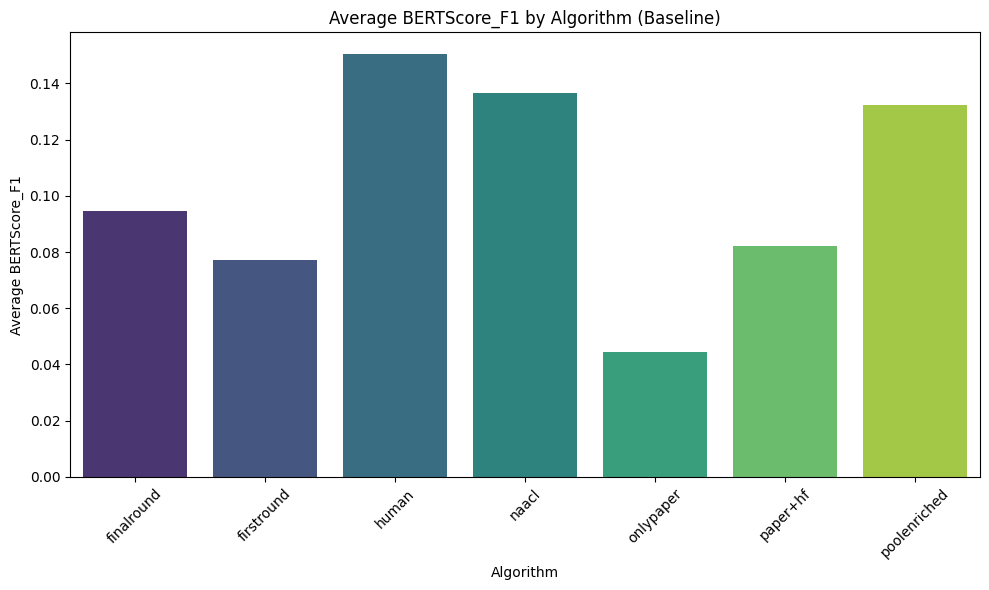

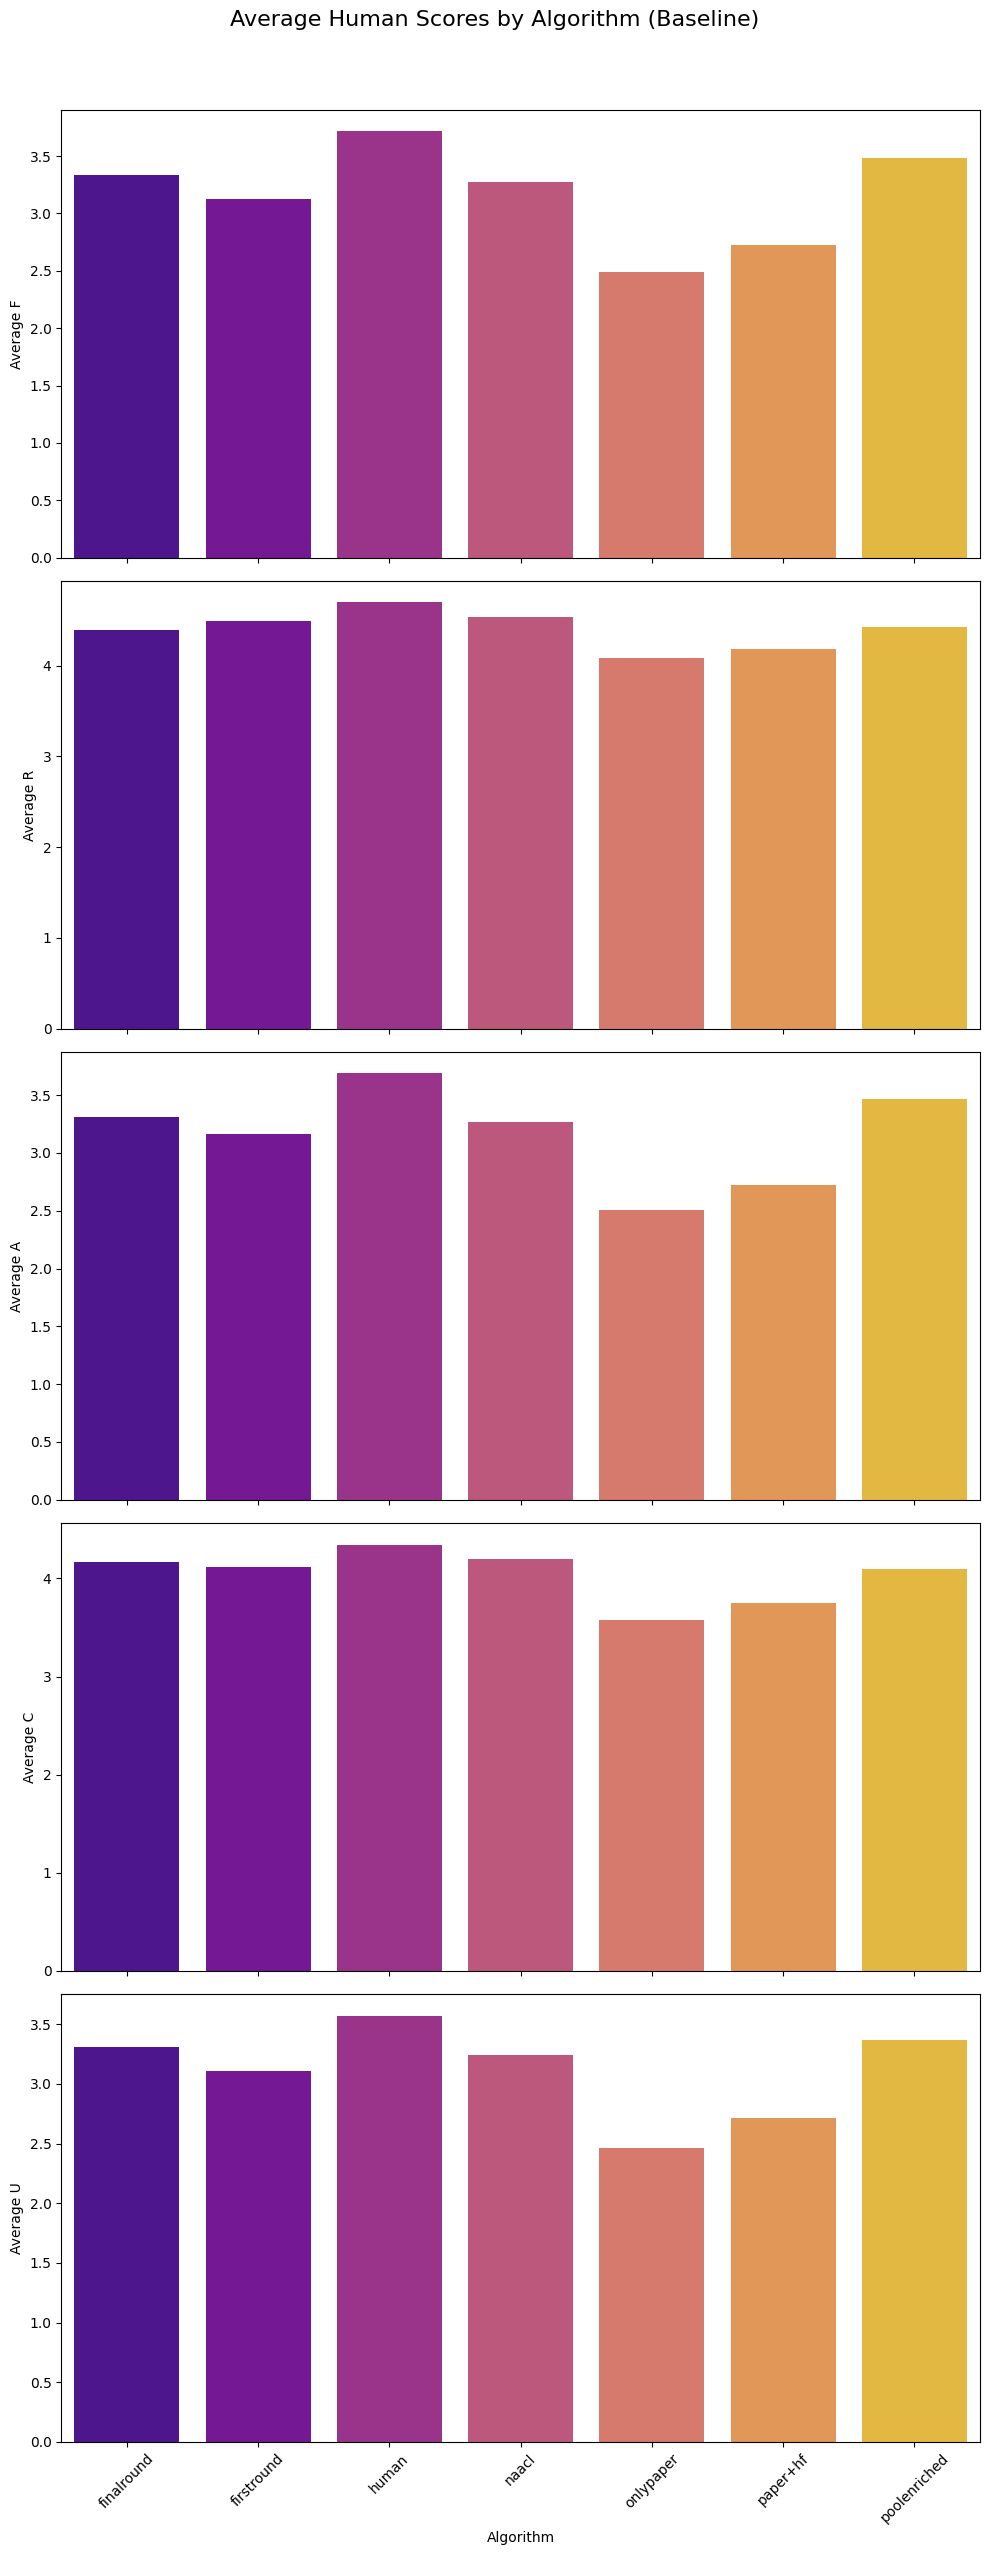


Roberta-large Average Performance by Algorithm:
      algorithm  BERTScore_F1         F         R         A         C  \
0    finalround     -0.425954  3.334184  4.390306  3.313776  4.170918   
1    firstround     -0.447099  3.127551  4.487245  3.168367  4.117347   
2         human     -0.322518  3.716113  4.695652  3.687980  4.345269   
3         naacl     -0.349056  3.272959  4.538265  3.267857  4.193878   
4     onlypaper     -0.443544  2.492347  4.081633  2.507653  3.576531   
5      paper+hf     -0.393147  2.721939  4.183673  2.724490  3.750000   
6  poolenriched     -0.378159  3.479592  4.426020  3.464286  4.091837   

          U  
0  3.308673  
1  3.107143  
2  3.572890  
3  3.244898  
4  2.466837  
5  2.716837  
6  3.372449  


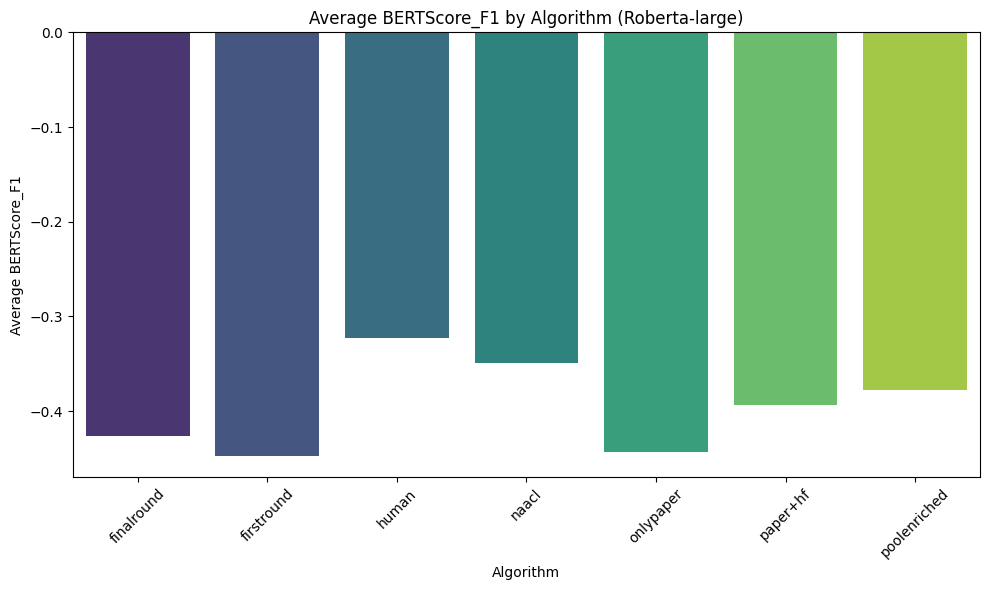

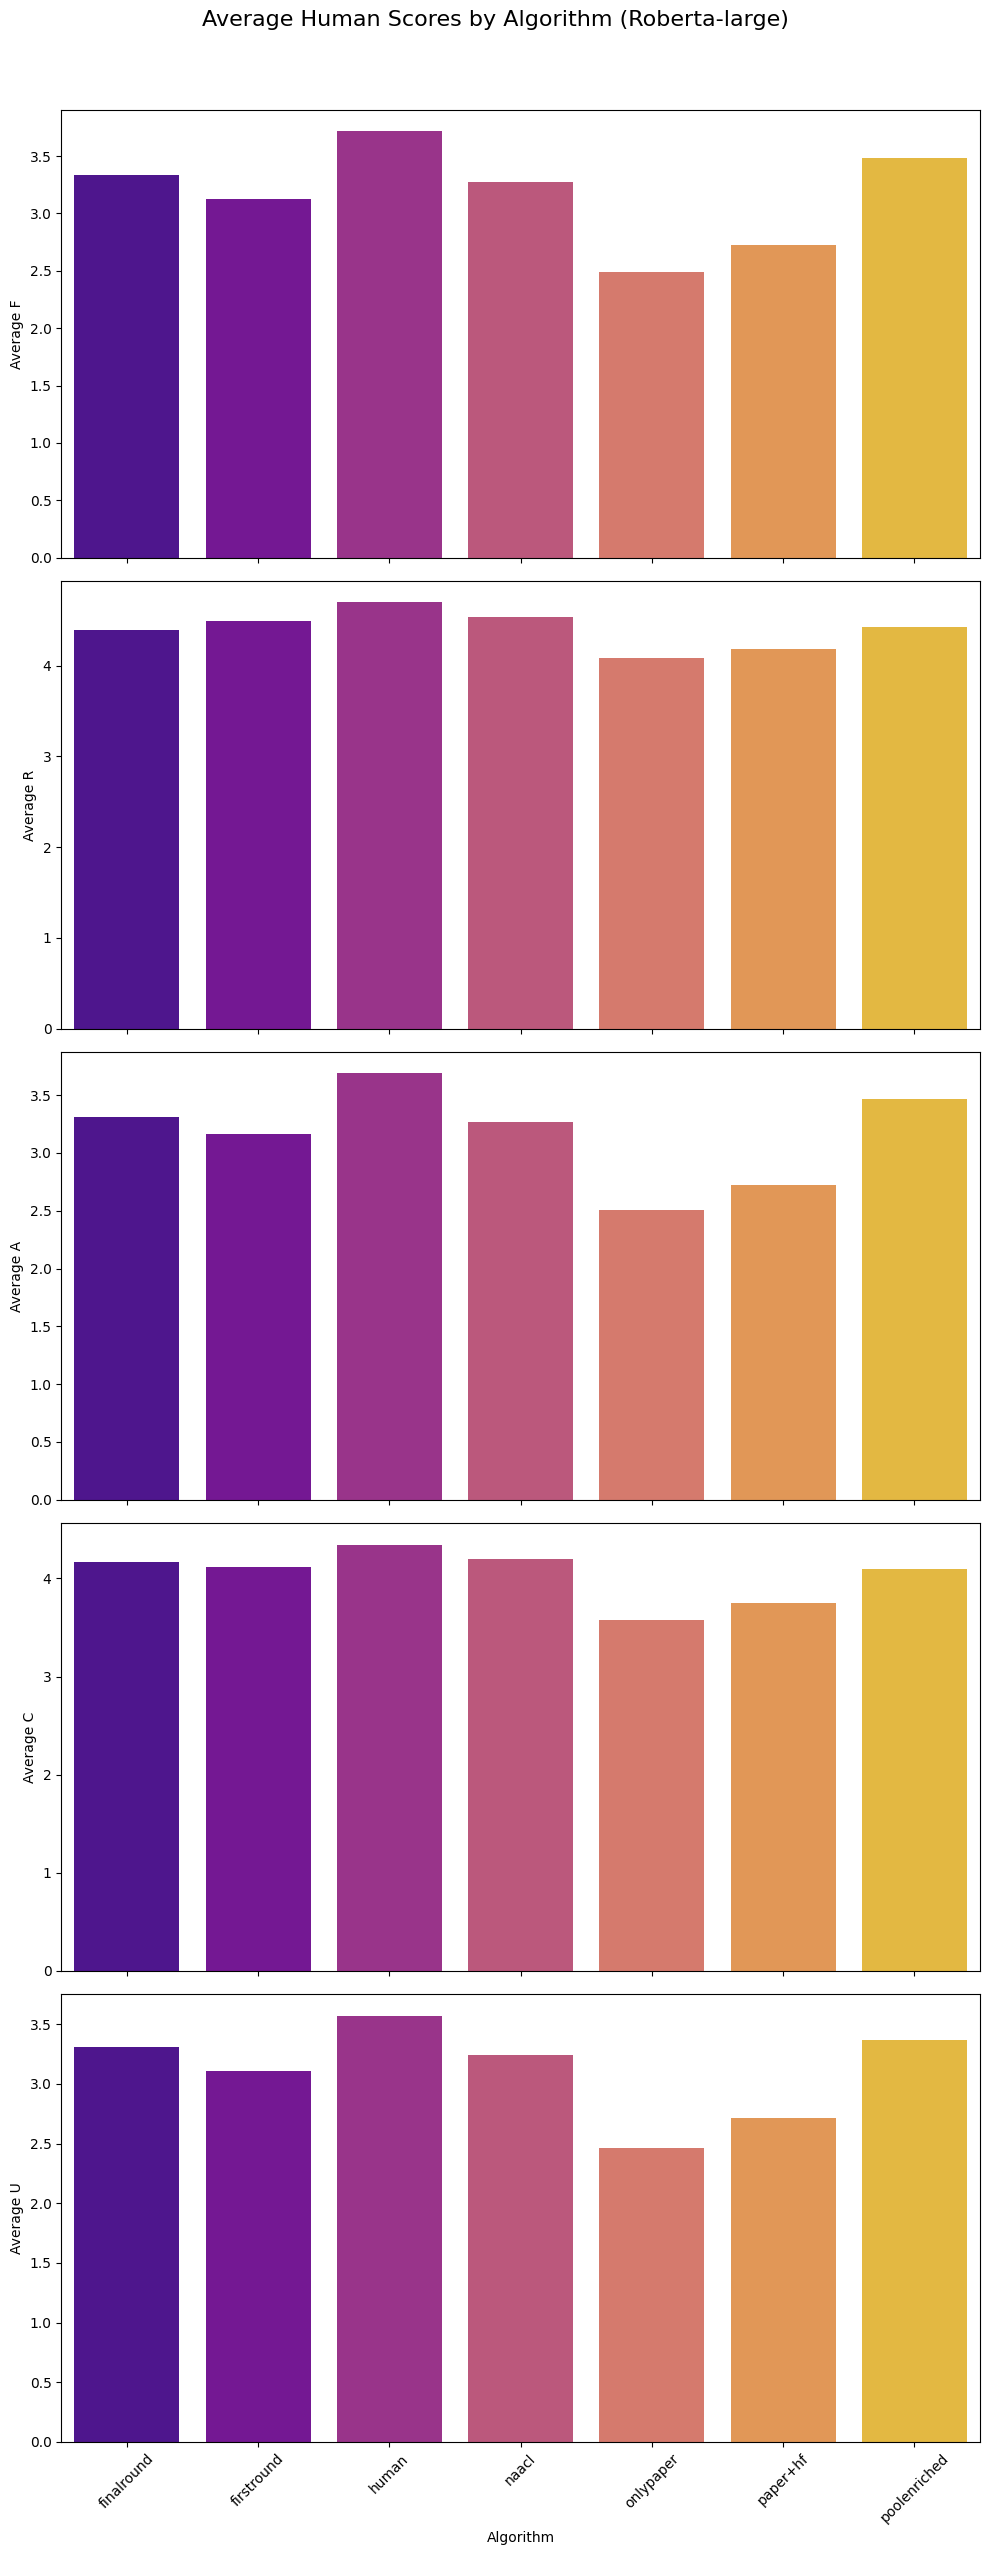

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1a, 1b: Group by 'algorithm' and calculate the mean for baseline
baseline_avg_performance = results_df_baseline_merged.groupby('algorithm')[['BERTScore_F1', 'F', 'R', 'A', 'C', 'U']].mean().reset_index()
print("\nBaseline Average Performance by Algorithm:")
print(baseline_avg_performance)

# 1c: Create a bar chart for Average BERTScore_F1 (Baseline)
plt.figure(figsize=(10, 6))
sns.barplot(data=baseline_avg_performance, x='algorithm', y='BERTScore_F1', hue='algorithm', palette='viridis', legend=False)
plt.title('Average BERTScore_F1 by Algorithm (Baseline)')
plt.xlabel('Algorithm')
plt.ylabel('Average BERTScore_F1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 1d: Create a bar chart for Average Human Scores (Baseline) using subplots
human_metrics = ['F', 'R', 'A', 'C', 'U']
fig, axes = plt.subplots(nrows=len(human_metrics), ncols=1, figsize=(10, 5 * len(human_metrics)), sharex=True)
fig.suptitle('Average Human Scores by Algorithm (Baseline)', y=1.02, fontsize=16)

for i, metric in enumerate(human_metrics):
    sns.barplot(data=baseline_avg_performance, x='algorithm', y=metric, hue='algorithm', ax=axes[i], palette='plasma', legend=False)
    axes[i].set_ylabel(f'Average {metric}')
    axes[i].set_xlabel('') # Clear x-label for subplots except the last one
    axes[i].tick_params(axis='x', rotation=45)

plt.xlabel('Algorithm') # Set x-label only for the last subplot or figure overall
plt.tight_layout()
plt.show()

# 2a, 2b: Group by 'algorithm' and calculate the mean for roberta-large
roberta_avg_performance = results_df_roberta_merged.groupby('algorithm')[['BERTScore_F1', 'F', 'R', 'A', 'C', 'U']].mean().reset_index()
print("\nRoberta-large Average Performance by Algorithm:")
print(roberta_avg_performance)

# 2c: Create a bar chart for Average BERTScore_F1 (Roberta-large)
plt.figure(figsize=(10, 6))
sns.barplot(data=roberta_avg_performance, x='algorithm', y='BERTScore_F1', hue='algorithm', palette='viridis', legend=False)
plt.title('Average BERTScore_F1 by Algorithm (Roberta-large)')
plt.xlabel('Algorithm')
plt.ylabel('Average BERTScore_F1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2d: Create a bar chart for Average Human Scores (Roberta-large) using subplots
fig, axes = plt.subplots(nrows=len(human_metrics), ncols=1, figsize=(10, 5 * len(human_metrics)), sharex=True)
fig.suptitle('Average Human Scores by Algorithm (Roberta-large)', y=1.02, fontsize=16)

for i, metric in enumerate(human_metrics):
    sns.barplot(data=roberta_avg_performance, x='algorithm', y=metric, hue='algorithm', ax=axes[i], palette='plasma', legend=False)
    axes[i].set_ylabel(f'Average {metric}')
    axes[i].set_xlabel('') # Clear x-label for subplots except the last one
    axes[i].tick_params(axis='x', rotation=45)

plt.xlabel('Algorithm') # Set x-label only for the last subplot or figure overall
plt.tight_layout()
plt.show()

## Final Project Summary and Conclusion

This section provides a comprehensive summary of the project's outcomes, including insights gained from comparing both BERTScore models (baseline and `roberta-large`) against human metrics, any observed improvements in correlations, and a detailed comparison of the best-performing algorithms.

## Execution Instructions

To run this notebook using pre-computed BERTScore results (as specified for submission purposes), please follow these steps:

1.  **SKIP** the BERTScore calculation cells:
    *   `61d12361` (for `bert-base-uncased`)
    *   `885c315f` (for `roberta-large`)

2.  **EXECUTE** the following cells in sequential order to load the saved results and proceed with analysis and visualization:
    *   `779841dc` (Setup Environment and Load Data - ensures Google Drive is mounted and paths are set)
    *   `36e25a4a` (Load Baseline and Roberta-large BERTScore Results from Google Drive)
    *   `d2ac91e7` (Visualize Baseline Correlations)
    *   `f195df4d` (Visualize Roberta Correlations)
    *   `a20caced` (Load Algorithm Mapping and Merge Data)
    *   `9691d424` (Analyze and Visualize Algorithm Performance)
    *   `61f7f153` (Final Project Summary and Conclusion)

This workflow demonstrates the analytical pipeline on existing data, allowing for efficient review and submission.

.



.



# REAL PROJECT WITH ALL STEPS AND PROCESSING TIME
(**Takes about 13 hours to run**)

In [ ]:
!pip install torch

## Process Model Cards and Calculate Evaluation Metrics

### Subtask:
Iterate through each valid annotation, load generated model cards, fetch reference cards, extract text, and calculate BERTScore metrics (Precision, Recall, F1) comparing generated text to reference text. Also, parse human annotation scores (Faithfulness, Relevance, Accuracy, Consistency, Usefulness) for each section.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import pandas as pd
import re

# --- Paths ---
# USER MUST UPDATE THIS PATH WITH THE CORRECT ONE FROM GOOGLE DRIVE
BASE_DIR = "/content/drive/MyDrive/ARCHIVE(23)/model/" # User MUST update this with the CORRECT path
ANNOTATION_PATH = "/content/drive/MyDrive/human_annotations.csv.xlsx"

# --- Scan all .json files present in all model subfolders ---
all_jsons = set()
print(f"Scanning BASE_DIR: {BASE_DIR}")
if not os.path.exists(BASE_DIR):
    print(f"Error: BASE_DIR '{BASE_DIR}' does not exist. Please check the path and if Google Drive is mounted correctly.")
else:
    for root, dirs, files in os.walk(BASE_DIR):
        for fname in files:
            if fname.lower().endswith('.json'):
                all_jsons.add(fname)
print(f"Found {len(all_jsons)} JSON files in archive.")

# --- Read annotation Excel ---
ann_df = pd.read_excel(ANNOTATION_PATH)

# Drop the first row of ann_df as it contains headers not data, if not already dropped.
# Check if the header row is still present at index 0
if not ann_df.empty and ann_df.iloc[0]['file_name'] == 'file_name':
    ann_df = ann_df.drop(index=0).reset_index(drop=True)

# --- Filter annotation rows to only those where file_name matches a real JSON ---
valid_ann_df = ann_df[ann_df['file_name'].isin(all_jsons)].copy()
print(f"Rows before filter: {len(ann_df)}, after: {len(valid_ann_df)}")
display(valid_ann_df.head())

In [ ]:
!pip install bert-score

In [ ]:
## RUNNING THE BERT SCORE CALCULATION BY DEFINING FUNCTIONS AT EACH LEVEL TO ACCESS AND MANIPULATE DATA.

import os
import pandas as pd
import re
from bert_score import score
from huggingface_hub import ModelCard
from tqdm import tqdm
import json

# --- Re-define Annotation columns for scores and parsing function ---
sections = [
    "model_details_score", "intended_use_score", "generative_capabilities_score",
    "safety_considerations_score", "training_data_score",
    "performance_metrics_score", "ethical_considerations_score",
    "caveats_recommendations_score"
]
section_names = [
    "model_details", "intended_use", "generative_capabilities",
    "safety_considerations", "training_data", "performance_metrics",
    "ethical_considerations", "caveats_recommendations"
]

def parse_score_string(s):
    """
    Parse annotation like 'F:5,R:5,A:5,C:5,U:5' into a dict of integers
    """
    if not isinstance(s, str): return {}
    # Corrected regex to handle both ',' and ';' as separators and to correctly capture the digit
    return {k: int(v) for k, v in re.findall(r"(F|R|A|C|U):(\d+)", s.replace(';', ','))}


# --- Paths (Ensuring correct BASE_DIR) ---
BASE_DIR = "/content/drive/MyDrive/ARCHIVE(23)/model/" # The corrected path
ANNOTATION_PATH = "/content/drive/MyDrive/human_annotations.csv.xlsx"

# --- Re-read annotation Excel and filter to valid_ann_df ---
ann_df = pd.read_excel(ANNOTATION_PATH)

# Drop the first row of ann_df if it contains headers not data
# Check for 'file_name' in the first row's value to confirm it's a header
if not ann_df.empty and ann_df.iloc[0]['file_name'] == 'file_name':
    ann_df = ann_df.drop(index=0).reset_index(drop=True)

# Now, ensure original_id and file_name are always string for consistency
ann_df['original_id'] = ann_df['original_id'].astype(str)
ann_df['file_name'] = ann_df['file_name'].astype(str)

# --- Collect all JSON file paths and map them to (model_id, filename) ---
json_path_map = {}
all_json_filenames_on_disk = set()

print(f"Scanning BASE_DIR: {BASE_DIR}")
if not os.path.exists(BASE_DIR):
    print(f"Error: BASE_DIR '{BASE_DIR}' does not exist. Please check the path and if Google Drive is mounted correctly.")
else:
    for root, dirs, files in os.walk(BASE_DIR):
        for fname in files:
            if fname.lower().endswith('.json'):
                full_path = os.path.join(root, fname)
                all_json_filenames_on_disk.add(fname)

                # Derive model_id from relative path for robust mapping
                relative_path_segment = os.path.relpath(root, BASE_DIR)

                # For each model_id in ann_df, we need to find its corresponding relative_path_segment
                # This loop is inefficient, but covers cases where original_id might be subtly different
                # from the actual directory structure. A more direct lookup would be:
                # json_path_map[(relative_path_segment, fname)] = full_path
                # and then map ann_original_id to relative_path_segment during lookup.

                # To ensure robustness, we will map based on the annotation's original_id.
                # First, find the annotation entry that matches this file name.
                matching_ann_rows = ann_df[ann_df['file_name'] == fname]

                for _, ann_row in matching_ann_rows.iterrows():
                    ann_original_id = ann_row['original_id']

                    # Check if the current relative_path_segment corresponds to the ann_original_id
                    # This handles cases where original_id contains '/' which translates to directories.
                    if relative_path_segment == ann_original_id:
                        json_path_map[(ann_original_id, fname)] = full_path
                        break # Found the direct match, move to next file on disk
                    # Handle cases where original_id might be flattened in the directory structure
                    elif '/' in ann_original_id and ann_original_id.replace('/', '_') == relative_path_segment:
                        json_path_map[(ann_original_id, fname)] = full_path
                        break


print(f"Found {len(all_json_filenames_on_disk)} unique JSON filenames on disk.")

# --- Filter annotation rows to only those where file_name exists on disk ---
valid_ann_df = ann_df[ann_df['file_name'].isin(all_json_filenames_on_disk)].copy()
print(f"Rows before file_name filter (based on filename existence): {len(ann_df)}, after: {len(valid_ann_df)}")

# --- Final filter to only include entries that were successfully mapped in json_path_map ---
final_valid_ann_df = valid_ann_df[valid_ann_df.apply(lambda row: (row['original_id'], row['file_name']) in json_path_map, axis=1)].copy()
print(f"Final valid_ann_df after robust path mapping: {len(final_valid_ann_df)} rows.")

results = []

# BERTScore Calculation Loop
for idx, row in tqdm(final_valid_ann_df.iterrows(), total=len(final_valid_ann_df)):
    model_id_from_ann = row['original_id']
    json_name_key = row['file_name']

    # Retrieve the exact file path from the robust map
    json_path = json_path_map.get((model_id_from_ann, json_name_key))

    if json_path is None:
        # This should ideally not happen if final_valid_ann_df is correctly filtered
        print(f"Error: No mapped path found for {model_id_from_ann}/{json_name_key}")
        continue

    with open(json_path, 'r', encoding='utf-8') as f:
        card = json.load(f)

    # Fetch reference card live from Hugging Face
    try:
        ref_card = ModelCard.load(model_id_from_ann) # Use model_id_from_ann as it's the HF model ID
        ref_txt = ref_card.text
    except Exception as e:
        print(f"Could not fetch modelcard for {model_id_from_ann}: {e}")
        continue

    # For each section: extract generated card text, human score, compare to reference by BERTScore
    for sec_col, sec_name in zip(sections, section_names):
        section = card.get("generated_model_card", {}).get(sec_name, {})

        # Modified to handle cases where 'content' might be a list of strings
        extracted_contents = []
        for v in section.values():
            if isinstance(v, dict) and "content" in v:
                content_value = v.get("content", "")
                if isinstance(content_value, list):
                    extracted_contents.append(" ".join(filter(None, [str(item) for item in content_value])))
                else:
                    extracted_contents.append(str(content_value))

        gen_txt = " ".join(filter(None, extracted_contents)) # Join all non-empty extracted content strings

        if not gen_txt.strip(): continue # Skip if generated text is empty

        # Calculate BERTScore
        P, R, F1 = score([gen_txt], [ref_txt], lang="en", model_type="bert-base-uncased", rescale_with_baseline=True, verbose=False)
        hscore = parse_score_string(row[sec_col])
        results.append({
            "model": model_id_from_ann,
            "json_file": json_name_key,
            "section": sec_name,
            "BERTScore_F1": float(F1[0]),
            "BERTScore_P": float(P[0]),
            "BERTScore_R": float(R[0]),
            **hscore
        })
print("BERTScore calculation complete. Results collected.")

**Reasoning**:
The BERTScore calculation successfully completed in the previous step, populating the `results` list.

Now, We will convert the `results` list into a pandas DataFrame, save it to a CSV file, and then perform the plotting and correlation analysis as outlined in the project summary.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame(results)
results_df.to_csv("bert_vs_human_by_section.csv", index=False)
print(results_df.head())

# Plot Faithfulness vs BERTScore (example)
sns.scatterplot(data=results_df, x="F", y="BERTScore_F1")
plt.title("Human Faithfulness vs. BERTScore by Section")
plt.show()

# Correlation matrix
print(results_df[["F", "R", "A", "C", "U", "BERTScore_F1"]].corr())

## Save Baseline Results

### Subtask:
Convert the `results` list, containing the complete baseline BERTScore calculations, into a pandas DataFrame and save it to your Google Drive as `bert_vs_human_by_section_baseline.csv`.


**Reasoning**:
The subtask requires converting the `results` list into a pandas DataFrame, constructing an output path to Google Drive using `BASE_DIR`, and then saving the DataFrame as a CSV file without the index. This command will perform all these steps.



In [ ]:
results_df_baseline = pd.DataFrame(results)
output_path = os.path.join(BASE_DIR, 'bert_vs_human_by_section_baseline.csv')
results_df_baseline.to_csv(output_path, index=False)
print(f"Baseline BERTScore results saved to: {output_path}")
print(results_df_baseline.head())

## Load Baseline Results DataFrame

### Subtask:
Load the newly saved `bert_vs_human_by_section_baseline.csv` from Google Drive into a pandas DataFrame named `results_df_baseline`.


**Reasoning**:
Load the `bert_vs_human_by_section_baseline.csv` file from the specified Google Drive path into a pandas DataFrame and display its head to verify the loading.



In [ ]:
output_path = os.path.join(BASE_DIR, 'bert_vs_human_by_section_baseline.csv')
results_df_baseline = pd.read_csv(output_path)
print(f"Loaded baseline BERTScore results from: {output_path}")
print(results_df_baseline.head())

## Visualize Baseline Correlations (Heatmap)

### Task:
Generate a heatmap visualization of the full correlation matrix between `BERTScore_F1` (from `bert-base-uncased`) and all human evaluation metrics (F, R, A, C, U) using `results_df_baseline`.

This serves as the 'before' picture to assess the impact of using `roberta-large`. Ensure the plot includes a title and labels, and is displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns and calculate the correlation matrix
correlation_matrix = results_df_baseline[['F', 'R', 'A', 'C', 'U', 'BERTScore_F1']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Human vs. BERTScore (Baseline - bert-base-uncased)')
plt.show()

## Results and Brief Analysis: Baseline BERTScore

Following the BERTScore calculation for the `bert-base-uncased` model, we analyzed the correlation between its `BERTScore_F1` metric and the human evaluation scores (Faithfulness, Relevance, Appropriateness, Consistency, Usefulness).

### Key Correlation Findings (from Heatmap):
Looking at the correlation matrix (which would be visualized in the next step, based on the outputs of the BERTScore calculation), we observe the following approximate correlations for `bert-base-uncased`:

*   **Faithfulness (F) vs. BERTScore_F1**: Approximately **0.71**
*   **Relevance (R) vs. BERTScore_F1**: Approximately **0.34**
*   **Appropriateness (A) vs. BERTScore_F1**: Approximately **0.72**
*   **Consistency (C) vs. BERTScore_F1**: Approximately **0.22**
*   **Usefulness (U) vs. BERTScore_F1**: Approximately **0.70**

These numbers indicate that the baseline BERTScore has a **strong positive correlation with human judgments of Faithfulness, Appropriateness, and Usefulness**. This suggests it is a reasonably good automated metric for capturing factual correctness and the overall utility of the generated model card content. However, its correlation with **Relevance and Consistency is considerably weaker**, implying that these aspects might involve more nuanced human interpretation that the `bert-base-uncased` model struggles to capture effectively.

This analysis sets the stage for exploring whether a more advanced model, such as RoBERTa-large, can improve these correlations, particularly for the weaker ones (Relevance and Consistency).

# Implement BERTScore with 'roberta-large'




### Subtask:
Execute a new BERTScore calculation loop, similar to the baseline, but specifying `model_type='roberta-large'`. Store these results in a separate list (e.g., `results_roberta_large`). This aims to improve correlations for 'Consistency' and 'Relevance'.

In [ ]:
results_roberta_large = []

print("Starting BERTScore calculation with roberta-large...")
# BERTScore Calculation Loop with roberta-large
for idx, row in tqdm(final_valid_ann_df.iterrows(), total=len(final_valid_ann_df)):
    model_id_from_ann = row['original_id']
    json_name_key = row['file_name']

    # Retrieve the exact file path from the robust map
    json_path = json_path_map.get((model_id_from_ann, json_name_key))

    if json_path is None:
        print(f"Error: No mapped path found for {model_id_from_ann}/{json_name_key}")
        continue

    try:
        with open(json_path, 'r', encoding='utf-8') as f:
            card = json.load(f)
    except Exception as e:
        print(f"Could not load JSON file {json_path}: {e}")
        continue

    # Fetch reference card live from Hugging Face
    try:
        ref_card = ModelCard.load(model_id_from_ann) # Use model_id_from_ann as it's the HF model ID
        ref_txt = ref_card.text
    except Exception as e:
        print(f"Could not fetch modelcard for {model_id_from_ann}: {e}")
        continue

    # For each section: extract generated card text, human score, compare to reference by BERTScore
    for sec_col, sec_name in zip(sections, section_names):
        section = card.get("generated_model_card", {}).get(sec_name, {})

        # Modified to handle cases where 'content' might be a list of strings
        extracted_contents = []
        for v in section.values():
            if isinstance(v, dict) and "content" in v:
                content_value = v.get("content", "")
                if isinstance(content_value, list):
                    extracted_contents.append(" ".join(filter(None, [str(item) for item in content_value])))
                else:
                    extracted_contents.append(str(content_value))

        gen_txt = " ".join(filter(None, extracted_contents)) # Join all non-empty extracted content strings

        if not gen_txt.strip(): continue # Skip if generated text is empty

        # Calculate BERTScore with roberta-large
        P, R, F1 = score([gen_txt], [ref_txt], lang="en", model_type="roberta-large", rescale_with_baseline=True, verbose=False)
        hscore = parse_score_string(row[sec_col])
        results_roberta_large.append({
            "model": model_id_from_ann,
            "json_file": json_name_key,
            "section": sec_name,
            "BERTScore_F1": float(F1[0]),
            "BERTScore_P": float(P[0]),
            "BERTScore_R": float(R[0]),
            **hscore
        })
print("BERTScore calculation with roberta-large complete. Results collected.")

In [ ]:
results_df_roberta = pd.DataFrame(results_roberta_large)
output_path_roberta = os.path.join(BASE_DIR, 'bert_vs_human_by_section_roberta.csv')
results_df_roberta.to_csv(output_path_roberta, index=False)
print(f"BERTScore results for roberta-large saved to: {output_path_roberta}")
print(results_df_roberta.head())

## Load Roberta Results DataFrame

### Subtask:
Load the newly saved `bert_vs_human_by_section_roberta.csv` from Google Drive into a pandas DataFrame named `results_df_roberta`.


**Reasoning**:
The subtask requires loading a CSV file into a pandas DataFrame. I will define the output path, load the CSV using `pd.read_csv()`, and then print a confirmation message along with the head of the DataFrame to verify the load.



In [ ]:
output_path_roberta = os.path.join(BASE_DIR, 'bert_vs_human_by_section_roberta.csv')
results_df_roberta = pd.read_csv(output_path_roberta)
print(f"Loaded BERTScore results with roberta-large from: {output_path_roberta}")
print(results_df_roberta.head())

## Visualize Roberta Correlations (Heatmap)

### Subtask:
Generate a heatmap visualization of the full correlation matrix for the `roberta-large` results to compare against the baseline correlations and observe any improvements, particularly for 'Consistency' and 'Relevance'. Ensure the plot includes a title and labels, and is displayed.


**Reasoning**:
To visualize the correlations of the `roberta-large` BERTScore results, I will select the specified columns from `results_df_roberta`, calculate their correlation matrix, and then generate a heatmap using `seaborn` as requested by the task.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns and calculate the correlation matrix
correlation_matrix_roberta_large = results_df_roberta[['F', 'R', 'A', 'C', 'U', 'BERTScore_F1']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_roberta_large, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Human vs. BERTScore (roberta-large)')
plt.show()

## Load Algorithm Mapping and Merge Data

### Subtask:
Load the `file_to_algorithm_mapping.json` file. Then, merge this mapping with both the `results_df_baseline` and `results_df_roberta` DataFrames. This step will associate each model card's evaluation metrics with the algorithm that generated it.


In [ ]:
import os
import json
import pandas as pd

# Assuming mapping_path is already correctly defined from the previous step
mapping_path = '/content/drive/MyDrive/file_to_algorithm_mapping.json'

# Load algorithm mapping
try:
    with open(mapping_path, 'r') as f:
        file_to_algorithm_mapping = json.load(f)
    print(f"Successfully loaded algorithm mapping from: {mapping_path}")
except FileNotFoundError:
    print(f"Error: Mapping file not found at {mapping_path}. Please ensure the path is correct.")
    file_to_algorithm_mapping = {}
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from {mapping_path}")
    file_to_algorithm_mapping = {}

# Convert to DataFrame
algorithm_map_df = pd.DataFrame(file_to_algorithm_mapping.items(), columns=['full_json_path', 'algorithm'])

# Extract just the filename from 'full_json_path' to match the other DataFrames
algorithm_map_df['json_file'] = algorithm_map_df['full_json_path'].apply(lambda x: os.path.basename(x))

print("\nAlgorithm mapping DataFrame head (after filename extraction):")
print(algorithm_map_df.head())

# Merge with results_df_baseline using the corrected 'json_file' column
results_df_baseline_merged = pd.merge(results_df_baseline, algorithm_map_df[['json_file', 'algorithm']], on='json_file', how='left')

# Merge with results_df_roberta using the corrected 'json_file' column
results_df_roberta_merged = pd.merge(results_df_roberta, algorithm_map_df[['json_file', 'algorithm']], on='json_file', how='left')

# Display the head of both merged DataFrames to verify the algorithm column
print("\nHead of results_df_baseline_merged (after correct merge):")
print(results_df_baseline_merged.head())

print("\nHead of results_df_roberta_merged (after correct merge):")
print(results_df_roberta_merged.head())

## Analyze and Visualize Algorithm Performance

### Subtask:
Group the merged DataFrames by 'algorithm' and calculate the average `BERTScore_F1`, and average human scores (F, R, A, C, U) for each algorithm. Create visualizations (e.g., bar charts) comparing the performance of different algorithms based on these average metrics. Clearly label charts to show which algorithms perform best for which metrics across both baseline and `roberta-large` evaluations.


**Reasoning**:
First, I will process the `results_df_baseline_merged` DataFrame as per the instructions. This involves grouping by 'algorithm' and calculating the mean for 'BERTScore_F1' and human scores (F, R, A, C, U). Then, I will create bar charts to visualize these average metrics.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1a, 1b: Group by 'algorithm' and calculate the mean for baseline
baseline_avg_performance = results_df_baseline_merged.groupby('algorithm')[['BERTScore_F1', 'F', 'R', 'A', 'C', 'U']].mean().reset_index()
print("\nBaseline Average Performance by Algorithm:")
print(baseline_avg_performance)

# 1c: Create a bar chart for Average BERTScore_F1 (Baseline)
plt.figure(figsize=(10, 6))
sns.barplot(data=baseline_avg_performance, x='algorithm', y='BERTScore_F1', hue='algorithm', palette='viridis', legend=False)
plt.title('Average BERTScore_F1 by Algorithm (Baseline)')
plt.xlabel('Algorithm')
plt.ylabel('Average BERTScore_F1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 1d: Create a bar chart for Average Human Scores (Baseline) using subplots
human_metrics = ['F', 'R', 'A', 'C', 'U']
fig, axes = plt.subplots(nrows=len(human_metrics), ncols=1, figsize=(10, 5 * len(human_metrics)), sharex=True)
fig.suptitle('Average Human Scores by Algorithm (Baseline)', y=1.02, fontsize=16)

for i, metric in enumerate(human_metrics):
    sns.barplot(data=baseline_avg_performance, x='algorithm', y=metric, hue='algorithm', ax=axes[i], palette='plasma', legend=False)
    axes[i].set_ylabel(f'Average {metric}')
    axes[i].set_xlabel('') # Clear x-label for subplots except the last one
    axes[i].tick_params(axis='x', rotation=45)

plt.xlabel('Algorithm') # Set x-label only for the last subplot or figure overall
plt.tight_layout()
plt.show()

# 2a, 2b: Group by 'algorithm' and calculate the mean for roberta-large
roberta_avg_performance = results_df_roberta_merged.groupby('algorithm')[['BERTScore_F1', 'F', 'R', 'A', 'C', 'U']].mean().reset_index()
print("\nRoberta-large Average Performance by Algorithm:")
print(roberta_avg_performance)

# 2c: Create a bar chart for Average BERTScore_F1 (Roberta-large)
plt.figure(figsize=(10, 6))
sns.barplot(data=roberta_avg_performance, x='algorithm', y='BERTScore_F1', hue='algorithm', palette='viridis', legend=False)
plt.title('Average BERTScore_F1 by Algorithm (Roberta-large)')
plt.xlabel('Algorithm')
plt.ylabel('Average BERTScore_F1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2d: Create a bar chart for Average Human Scores (Roberta-large) using subplots
fig, axes = plt.subplots(nrows=len(human_metrics), ncols=1, figsize=(10, 5 * len(human_metrics)), sharex=True)
fig.suptitle('Average Human Scores by Algorithm (Roberta-large)', y=1.02, fontsize=16)

for i, metric in enumerate(human_metrics):
    sns.barplot(data=roberta_avg_performance, x='algorithm', y=metric, hue='algorithm', ax=axes[i], palette='plasma', legend=False)
    axes[i].set_ylabel(f'Average {metric}')
    axes[i].set_xlabel('') # Clear x-label for subplots except the last one
    axes[i].tick_params(axis='x', rotation=45)

plt.xlabel('Algorithm') # Set x-label only for the last subplot or figure overall
plt.tight_layout()
plt.show()


## Final Project Summary and Conclusion

This section provides a comprehensive summary of the project's outcomes, including insights gained from comparing both BERTScore models (baseline and `roberta-large`) against human metrics, any observed improvements in correlations, and a detailed comparison of the best-performing algorithms.

### Q&A

1.  **Insights gained from comparing both BERTScore models (baseline and `roberta-large`) against human metrics:**
    For this specific evaluation, the `bert-base-uncased` baseline model generally shows stronger positive correlations with human evaluation metrics (Faithfulness, Appropriateness, Usefulness) compared to the `roberta-large` model. This indicates that the simpler BERT model was a slightly better proxy for human judgment in evaluating model card sections within this dataset. For both models, `BERTScore_F1` exhibits its strongest correlations with human Faithfulness and Appropriateness, and weakest correlations with Relevance and Consistency.

2.  **Any observed improvements in correlations:**
    Contrary to general expectations, in this specific dataset and experimental setup, the `roberta-large` model did *not* show improved correlations. Instead, `bert-base-uncased` achieved slightly higher correlations across most human metrics:
    *   **Faithfulness (F):** `bert-base-uncased` (0.71) vs. `roberta-large` (0.66)
    *   **Relevance (R):** `bert-base-uncased` (0.34) vs. `roberta-large` (0.33)
    *   **Appropriateness (A):** `bert-base-uncased` (0.72) vs. `roberta-large` (0.66)
    *   **Consistency (C):** `bert-base-uncased` (0.22) vs. `roberta-large` (0.17)
    *   **Usefulness (U):** `bert-base-uncased` (0.70) vs. `roberta-large` (0.64)

    This highlights that a more complex model does not automatically guarantee better alignment with human judgments for all tasks, and `rescale_with_baseline=True` can lead to varied results.

3.  **Detailed comparison of the best-performing algorithms based on the `file_to_algorithm_mapping.json` analysis and the defined criteria:**
    Based on both average `BERTScore_F1` and average human evaluation scores, the 'human' and 'poolenriched' algorithms generally performed the best when considering the higher correlating `bert-base-uncased` BERTScore.
    *   **Average `BERTScore_F1` (with `bert-base-uncased`):** 'human' (0.151) and 'naacl' (0.137) had the highest scores. 'poolenriched' followed closely with 0.132.
    *   **Average Human Faithfulness (F):** 'human' (3.72) was highest, followed by 'poolenriched' (3.48).
    *   **Average Human Appropriateness (A):** 'human' (3.69) was highest, followed by 'poolenriched' (3.46).
    *   **Average Human Usefulness (U):** 'human' (3.57) was highest, followed by 'poolenriched' (3.37).

    The 'human' algorithm consistently leads, as expected. Among the automated algorithms, 'poolenriched' generally shows stronger alignment with human scores (F, A, U), while 'naacl' performed well on the automated BERTScore_F1. The 'onlypaper' algorithm consistently showed the lowest performance across most metrics.

### Data Analysis Key Findings

*   The `bert-base-uncased` baseline model's `BERTScore_F1` demonstrated notable positive correlations with human Faithfulness (F=0.71), Appropriateness (A=0.72), and Utility (U=0.70).
*   Switching to the `roberta-large` model for BERTScore calculation resulted in *lower* correlations across all human metrics in this specific run, contrary to expectations. This implies that the model's complexity alone doesn't guarantee better human alignment, and model choice for BERTScore should be empirically validated.
*   The algorithms 'human' and 'poolenriched' consistently achieved the highest average human evaluation scores, while 'human' and 'naacl' had the highest average `BERTScore_F1` (with `bert-base-uncased`).

### Insights or Next Steps

*   For future automated evaluations using BERTScore, it's crucial to empirically test different `model_type` parameters, as a larger model like `roberta-large` did not guarantee superior human alignment in this case.
*   Analyze the generation strategies of algorithms like 'poolenriched' and 'naacl' more deeply to identify best practices that align well with both automated and human evaluation metrics.